# Dataset Introduction 

The CIFAR-10 data consists of 60,000 32x32 color images in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images in the official data. We have preserved the train/test split from the original dataset.  The provided files are:

- train.7z - a folder containing the training images in png format
- test.7z - a folder containing the test images in png format
- trainLabels.csv - the training labels

To discourage certain forms of cheating (such as hand labeling) we have added 290,000 junk images in the test set. These images are ignored in the scoring. We have also made trivial modifications to the official 10,000 test images to prevent looking them up by file hash. These modifications should not appreciably affect the scoring. You should predict labels for all 300,000 images.

The label classes in the dataset are:

- airplane 
- automobile 
- bird 
- cat 
- deer 
- dog 
- frog 
- horse 
- ship 
- truck
The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

[Link for Dataset](https://www.kaggle.com/competitions/cifar-10)

# Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam 
from keras.datasets import cifar10
from keras.utils import np_utils, to_categorical
import time
from keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix

import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Turn off warnings for cleaner looking notebook
import warnings
warnings.simplefilter('ignore')

import tensorflow as tf

tf.config.list_physical_devices("GPU")

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

/kaggle/input/cifar10-python/cifar-10-python.tar.gz
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_1
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_2
/kaggle/input/cifar10-python/cifar-10-batches-py/batches.meta
/kaggle/input/cifar10-python/cifar-10-batches-py/test_batch
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_3
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_5
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_4
/kaggle/input/cifar10-python/cifar-10-batches-py/readme.html


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Loading the Data

In [2]:
(X_train,y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
X_train[123].min(), X_train[123].max()

(1, 243)

# Plotting Sample

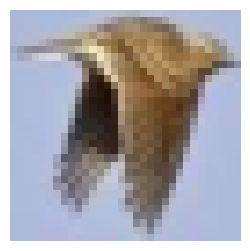

In [5]:
plt.figure(figsize=(3, 3))
plt.imshow(X_train[123], cmap='gray')
plt.axis('off')
plt.show()

In [6]:
classes= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']

In [7]:
classes[y_train[123][0]]

'bird'

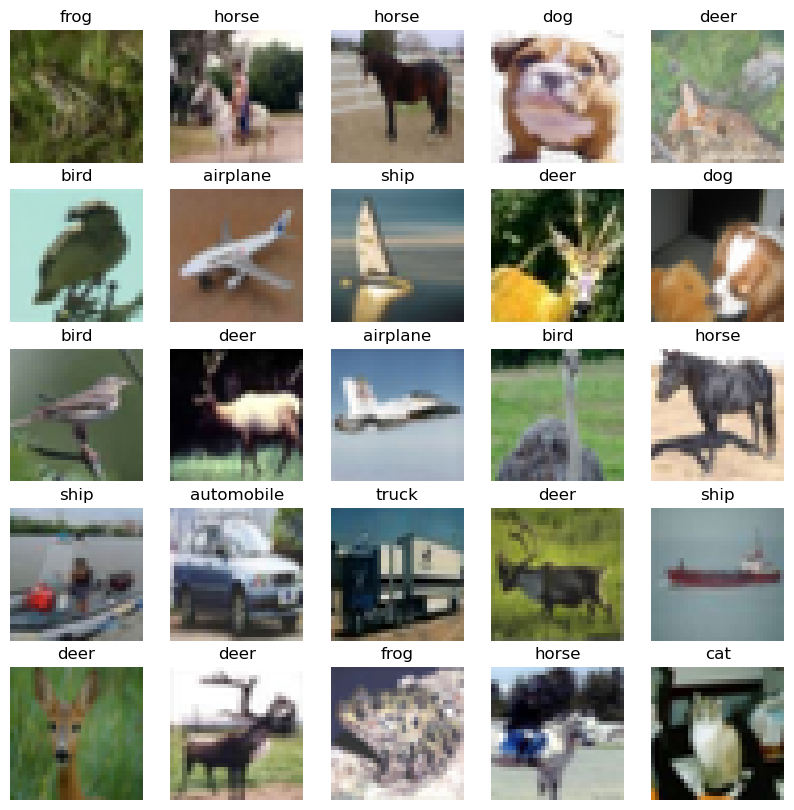

In [8]:
plt.figure(figsize=(10, 10))

for i in range(25):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(5, 5, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

## Reshape the Data

In [9]:
# Normalization

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[123].min(), X_train[123].max()

(0.003921569, 0.9529412)

# Changing Dtype of Target Feature to Categorical

In [11]:
y_Example = to_categorical(y_train)

y_test_cat = to_categorical(y_test, 10)
y_train_cat = to_categorical(y_train, 10)
np.min(y_Example == y_train_cat), y_test_cat.shape

(True, (10000, 10))

In [12]:
y_train_cat[123]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

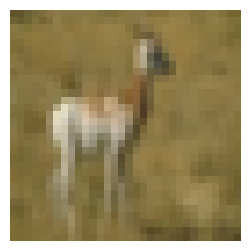

In [13]:
plt.figure(figsize=(3, 3))
plt.imshow(X_train[58])
plt.axis('off')
plt.show()

# Convolutional Neural Network

## MODELLING - 1

In [14]:
# First Model

model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation='relu'))
model1.add(MaxPool2D(2, 2))
model1.add(Flatten())

model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer = Adam(learning_rate = 1e-3))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 64)                401472    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 403,690
Trainable params: 403,690
Non-trainable params: 0
__________________________________________________

# Early Stop

In [15]:
from tqdm import tqdm
# from keras_tqdm import TQDMCallback
from tqdm.keras import TqdmCallback

In [16]:
earlyStoppingCallback = EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)

fitData1 = model1.fit(X_train, y_train_cat, batch_size=32, epochs=50, validation_data=(X_test, y_test_cat), 
                    callbacks=[earlyStoppingCallback, TqdmCallback()], verbose=True)
fitData1

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/50
1563/1563 [==============================] - 16s 6ms/step - loss: 1.4928 - accuracy: 0.4652 - val_loss: 1.2921 - val_accuracy: 0.5480
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1973 - accuracy: 0.5795 - val_loss: 1.1839 - val_accuracy: 0.5853
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0772 - accuracy: 0.6201 - val_loss: 1.0947 - val_accuracy: 0.6165
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9982 - accuracy: 0.6511 - val_loss: 1.0599 - val_accuracy: 0.6292
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9395 - accuracy: 0.6700 - val_loss: 1.0495 - val_accuracy: 0.6340
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8835 - accuracy: 0.6936 - val_loss: 1.0206 - val_accuracy: 0.6506
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8390 - accuracy: 0.7062 - val_loss: 1.0928 - val_accuracy

# Plotting Metrics of the Model

In [17]:
model1.metrics_names

['loss', 'accuracy']

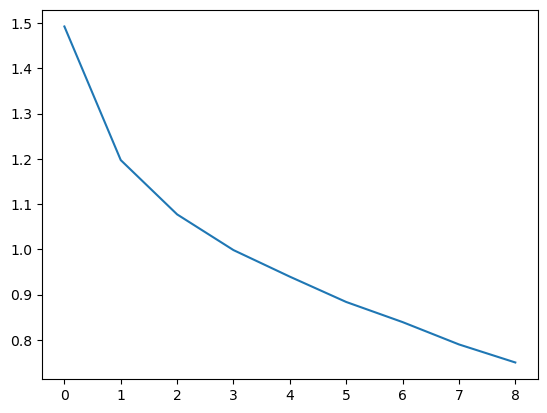

In [18]:
loss = model1.history.history['loss']
plt.plot(loss)
plt.show();

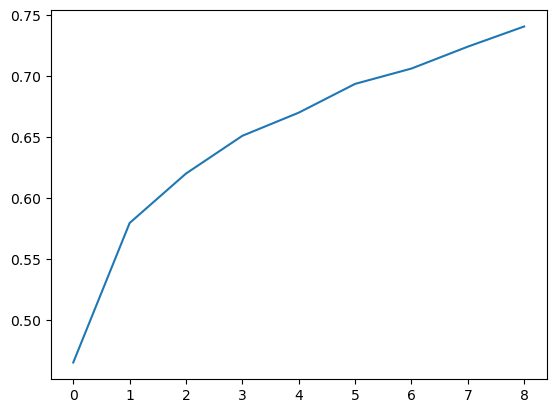

In [19]:
acc = model1.history.history['accuracy']
plt.plot(acc)
plt.show();

In [20]:
fitData1.history

{'loss': [1.49282705783844,
  1.197285771369934,
  1.0772156715393066,
  0.9982278943061829,
  0.9394536018371582,
  0.8834815621376038,
  0.8389923572540283,
  0.7895993590354919,
  0.7496621608734131],
 'accuracy': [0.46518000960350037,
  0.5795400142669678,
  0.6201000213623047,
  0.6510599851608276,
  0.6700199842453003,
  0.6936200261116028,
  0.7062000036239624,
  0.7241600155830383,
  0.7407000064849854],
 'val_loss': [1.2920945882797241,
  1.1839085817337036,
  1.0946623086929321,
  1.0599006414413452,
  1.0494664907455444,
  1.020584225654602,
  1.092847228050232,
  1.0633060932159424,
  1.0805728435516357],
 'val_accuracy': [0.5479999780654907,
  0.5853000283241272,
  0.6165000200271606,
  0.6291999816894531,
  0.6340000033378601,
  0.650600016117096,
  0.6244000196456909,
  0.6333000063896179,
  0.6464999914169312]}

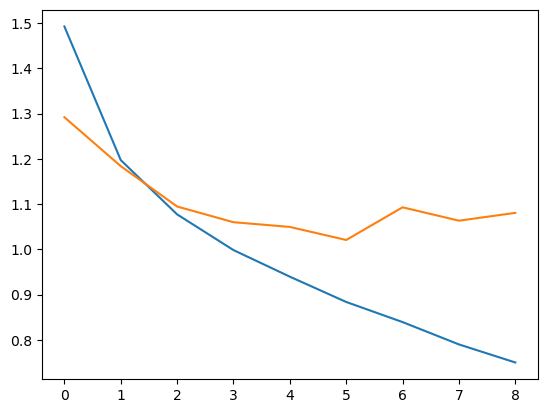

In [21]:
loss = fitData1.history['loss']
val_loss = fitData1.history['val_loss']
acc = fitData1.history['accuracy']
val_acc = fitData1.history['val_accuracy']

plt.plot(loss)
plt.plot(val_loss)
plt.show()

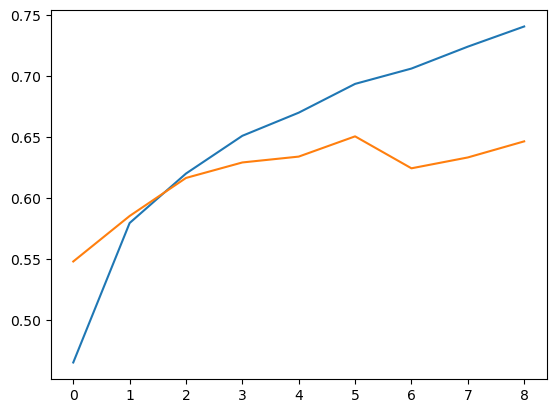

In [22]:
plt.plot(acc)
plt.plot(val_acc)
plt.show()

# Evaluation of the Model

In [23]:
import tensorflow_addons as tfa

ev1 = model1.evaluate(X_test, y_test_cat, 
                    callbacks=[tfa.callbacks.TQDMProgressBar()])

0/313           ETA: ?s - Evaluating

313/313 [==============================] - 1s 3ms/step - loss: 1.0206 - accuracy: 0.6506


# The Model Predict

In [24]:
y_preds = model1.predict(X_test)
y_preds

313/313 [==============================] - 1s 2ms/step


array([[3.9631571e-03, 8.4330596e-04, 7.7166092e-03, ..., 6.8117282e-04,
        1.5983602e-01, 1.3467561e-02],
       [9.1835111e-02, 3.2475647e-02, 1.7479755e-05, ..., 5.6129529e-08,
        8.7331301e-01, 2.3478877e-03],
       [3.2954046e-01, 3.6764074e-02, 2.7172959e-03, ..., 7.3493220e-04,
        4.0650517e-01, 2.1745400e-01],
       ...,
       [8.7031374e-05, 2.0245570e-06, 5.3045489e-02, ..., 1.3786211e-02,
        6.8119793e-05, 6.8656540e-05],
       [1.3317451e-01, 6.4317852e-01, 6.0398672e-03, ..., 2.8708880e-03,
        1.9886696e-03, 2.0438472e-03],
       [7.4200754e-05, 1.6660721e-04, 8.3296653e-04, ..., 9.2606980e-01,
        1.1498593e-05, 7.4369268e-04]], dtype=float32)

In [25]:
y_pred = np.argmax(y_preds, axis=1)
y_pred[0]

3

In [26]:
np.argmax(y_preds, axis=1)

array([3, 8, 8, ..., 5, 1, 7])

In [27]:
y_test_cat2 = np.argmax(y_test_cat, axis=1)

# Report and Heatmap

In [28]:
print(classification_report(y_test_cat2, y_pred, target_names=classes))

              precision    recall  f1-score   support

    airplane       0.69      0.69      0.69      1000
  automobile       0.78      0.73      0.75      1000
        bird       0.56      0.49      0.52      1000
         cat       0.50      0.46      0.48      1000
        deer       0.65      0.54      0.59      1000
         dog       0.54      0.57      0.56      1000
        frog       0.69      0.76      0.72      1000
       horse       0.71      0.71      0.71      1000
        ship       0.74      0.76      0.75      1000
       truck       0.63      0.80      0.71      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000



In [29]:
confusion_matrix(y_test_cat2, y_pred)

array([[685,  24,  54,  27,   6,   7,  12,  11, 106,  68],
       [ 20, 731,   6,  12,   0,   6,  11,   8,  34, 172],
       [ 71,   9, 491,  63,  88,  93,  85,  52,  21,  27],
       [ 15,  17,  63, 458,  63, 200,  78,  44,  23,  39],
       [ 39,   6,  93,  62, 542,  48,  93,  88,  18,  11],
       [ 20,  10,  79, 156,  35, 573,  39,  54,  19,  15],
       [  6,  11,  43,  74,  37,  32, 755,   9,  12,  21],
       [ 21,   5,  36,  33,  58,  81,  12, 711,   2,  41],
       [ 79,  40,   9,  19,   2,   5,   7,   6, 761,  72],
       [ 31,  84,   8,  13,   2,   7,  10,  20,  26, 799]])

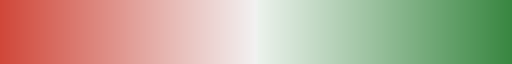

In [30]:
cmap = sns.diverging_palette(15, 130, as_cmap=True)
cmap

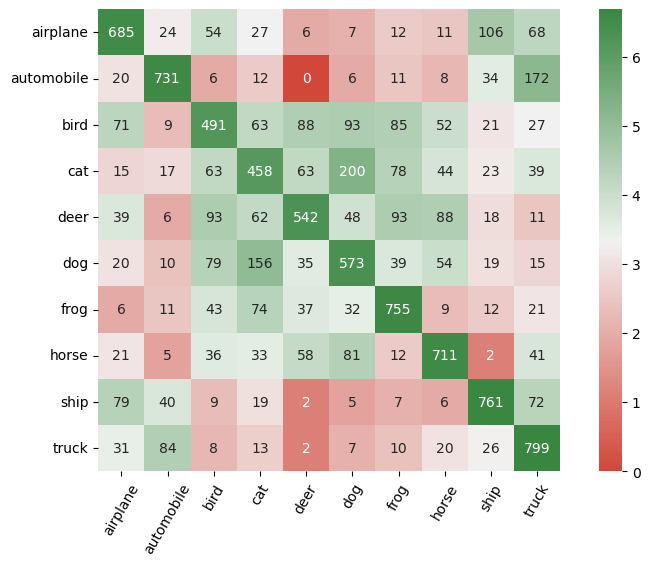

In [31]:
cm = confusion_matrix(y_test_cat2, y_pred)

plt.figure(figsize=(10, 6))

sns.heatmap(np.log1p(cm), annot=cm, cmap=cmap, fmt='d', 
            xticklabels=classes, yticklabels=classes, square=True)
plt.xticks(rotation=60)
plt.show()

*!!! The results are not that good, improvement is required. !!!*

## MODELLING - 2

In [32]:
model2 = Sequential()

model2.add(Conv2D(64, kernel_size=(4, 4), input_shape=(X_train.shape[1:]), activation='relu', padding='same'))
model2.add(Conv2D(32, kernel_size=(4, 4), activation='relu', padding='same'))
model2.add(MaxPool2D((2, 2)))
model2.add(Dropout(0.5))  

model2.add(Conv2D(32, kernel_size=(4, 4), activation='relu', padding='same'))
model2.add(MaxPool2D((2, 2)))
model2.add(Dropout(0.5))  

model2.add(Flatten())

model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer="adam")

In [33]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        3136      
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        32800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        16416     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                  

In [34]:
bar = tfa.callbacks.TQDMProgressBar()

fitData2 = model2.fit(X_train, y_train_cat, batch_size=32, epochs=50, validation_data=(X_test, y_test_cat),
                      callbacks=[earlyStoppingCallback, bar], verbose=True)
fitData2

Training:   0%|           0/50 ETA: ?s,  ?epochs/s

Epoch 1/50


0/1563           ETA: ?s - 

Epoch 1/50


2023-07-12 18:26:58.036669: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 16s 8ms/step - loss: 1.6627 - accuracy: 0.3908 - val_loss: 1.4039 - val_accuracy: 0.5089
Epoch 2/50


0/1563           ETA: ?s - 

Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3698 - accuracy: 0.5058 - val_loss: 1.2593 - val_accuracy: 0.5676
Epoch 3/50


0/1563           ETA: ?s - 

Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2510 - accuracy: 0.5534 - val_loss: 1.1346 - val_accuracy: 0.6047
Epoch 4/50


0/1563           ETA: ?s - 

Epoch 4/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1684 - accuracy: 0.5823 - val_loss: 1.1112 - val_accuracy: 0.6139
Epoch 5/50


0/1563           ETA: ?s - 

Epoch 5/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1063 - accuracy: 0.6035 - val_loss: 0.9971 - val_accuracy: 0.6492
Epoch 6/50


0/1563           ETA: ?s - 

Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0609 - accuracy: 0.6215 - val_loss: 1.0051 - val_accuracy: 0.6457
Epoch 7/50


0/1563           ETA: ?s - 

Epoch 7/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0213 - accuracy: 0.6359 - val_loss: 0.9455 - val_accuracy: 0.6829
Epoch 8/50


0/1563           ETA: ?s - 

Epoch 8/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9989 - accuracy: 0.6424 - val_loss: 0.9339 - val_accuracy: 0.6803
Epoch 9/50


0/1563           ETA: ?s - 

Epoch 9/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9677 - accuracy: 0.6548 - val_loss: 0.9250 - val_accuracy: 0.6806
Epoch 10/50


0/1563           ETA: ?s - 

Epoch 10/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9509 - accuracy: 0.6575 - val_loss: 0.9062 - val_accuracy: 0.6857
Epoch 11/50


0/1563           ETA: ?s - 

Epoch 11/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9316 - accuracy: 0.6658 - val_loss: 0.9026 - val_accuracy: 0.6885
Epoch 12/50


0/1563           ETA: ?s - 

Epoch 12/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9141 - accuracy: 0.6735 - val_loss: 0.8709 - val_accuracy: 0.6968
Epoch 13/50


0/1563           ETA: ?s - 

Epoch 13/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9068 - accuracy: 0.6775 - val_loss: 0.8811 - val_accuracy: 0.7005
Epoch 14/50


0/1563           ETA: ?s - 

Epoch 14/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8930 - accuracy: 0.6829 - val_loss: 0.8992 - val_accuracy: 0.6939
Epoch 15/50


0/1563           ETA: ?s - 

Epoch 15/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8838 - accuracy: 0.6849 - val_loss: 0.8636 - val_accuracy: 0.7013
Epoch 16/50


0/1563           ETA: ?s - 

Epoch 16/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8727 - accuracy: 0.6896 - val_loss: 0.8328 - val_accuracy: 0.7092
Epoch 17/50


0/1563           ETA: ?s - 

Epoch 17/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8668 - accuracy: 0.6921 - val_loss: 0.8625 - val_accuracy: 0.7087
Epoch 18/50


0/1563           ETA: ?s - 

Epoch 18/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8539 - accuracy: 0.6988 - val_loss: 0.8115 - val_accuracy: 0.7173
Epoch 19/50


0/1563           ETA: ?s - 

Epoch 19/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8482 - accuracy: 0.6995 - val_loss: 0.8470 - val_accuracy: 0.7024
Epoch 20/50


0/1563           ETA: ?s - 

Epoch 20/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8457 - accuracy: 0.6995 - val_loss: 0.8337 - val_accuracy: 0.7197
Epoch 21/50


0/1563           ETA: ?s - 

Epoch 21/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8339 - accuracy: 0.7037 - val_loss: 0.7930 - val_accuracy: 0.7324
Epoch 22/50


0/1563           ETA: ?s - 

Epoch 22/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8323 - accuracy: 0.7024 - val_loss: 0.7985 - val_accuracy: 0.7236
Epoch 23/50


0/1563           ETA: ?s - 

Epoch 23/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8192 - accuracy: 0.7091 - val_loss: 0.8250 - val_accuracy: 0.7167
Epoch 24/50


0/1563           ETA: ?s - 

Epoch 24/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8165 - accuracy: 0.7114 - val_loss: 0.7991 - val_accuracy: 0.7245


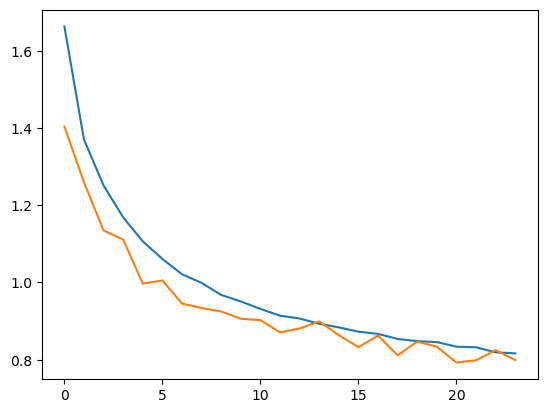

In [35]:
loss2 = fitData2.history['loss']
val_loss2 = fitData2.history['val_loss']
acc2 = fitData2.history['accuracy']
val_acc2 = fitData2.history['val_accuracy']

plt.plot(loss2)
plt.plot(val_loss2)
plt.show()

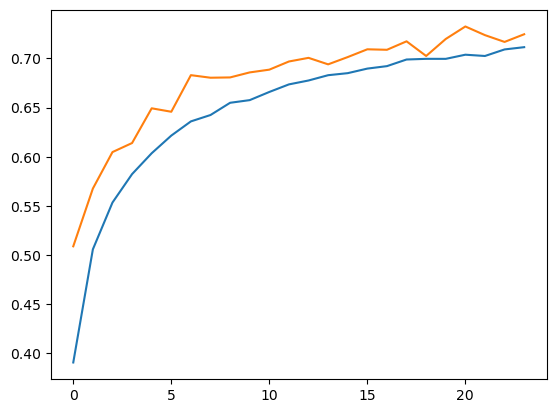

In [36]:
plt.plot(acc2)
plt.plot(val_acc2)
plt.show()

In [37]:
ev2 = model2.evaluate(X_test, y_test_cat, callbacks=[tfa.callbacks.TQDMProgressBar()])

0/313           ETA: ?s - Evaluating

313/313 [==============================] - 1s 4ms/step - loss: 0.7930 - accuracy: 0.7324


In [38]:
y_preds2 = model2.predict(X_test)
y_preds2

313/313 [==============================] - 1s 2ms/step


array([[3.0830374e-03, 2.7356353e-03, 7.7499389e-03, ..., 5.7624299e-03,
        3.3240791e-02, 2.1394952e-03],
       [4.1804364e-04, 1.2007923e-02, 6.4440064e-06, ..., 1.1922435e-07,
        9.8638552e-01, 1.1537992e-03],
       [1.6059342e-01, 8.2419515e-02, 1.6495837e-02, ..., 2.1672253e-03,
        5.8603382e-01, 1.1455832e-01],
       ...,
       [2.4364889e-03, 2.8620515e-04, 2.9910078e-02, ..., 6.1915454e-02,
        3.1904507e-04, 1.0541403e-03],
       [4.0961829e-01, 1.9522800e-01, 3.1749994e-02, ..., 7.7224453e-03,
        4.9502589e-03, 1.1669573e-02],
       [5.2198146e-07, 2.3322735e-07, 4.5908837e-05, ..., 9.6051699e-01,
        8.1758191e-07, 4.5150196e-06]], dtype=float32)

In [39]:
y_pred2 = np.argmax(y_preds2, axis=1)
y_pred2

array([3, 8, 8, ..., 5, 0, 7])

In [40]:
y_test_cat2_2 = np.argmax(y_test_cat, axis=1)

In [41]:
print(classification_report(y_test_cat2_2, y_pred2, target_names=classes))

              precision    recall  f1-score   support

    airplane       0.75      0.78      0.76      1000
  automobile       0.89      0.84      0.87      1000
        bird       0.69      0.52      0.60      1000
         cat       0.56      0.48      0.51      1000
        deer       0.63      0.75      0.69      1000
         dog       0.61      0.66      0.63      1000
        frog       0.74      0.83      0.79      1000
       horse       0.84      0.75      0.79      1000
        ship       0.81      0.86      0.83      1000
       truck       0.80      0.85      0.83      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



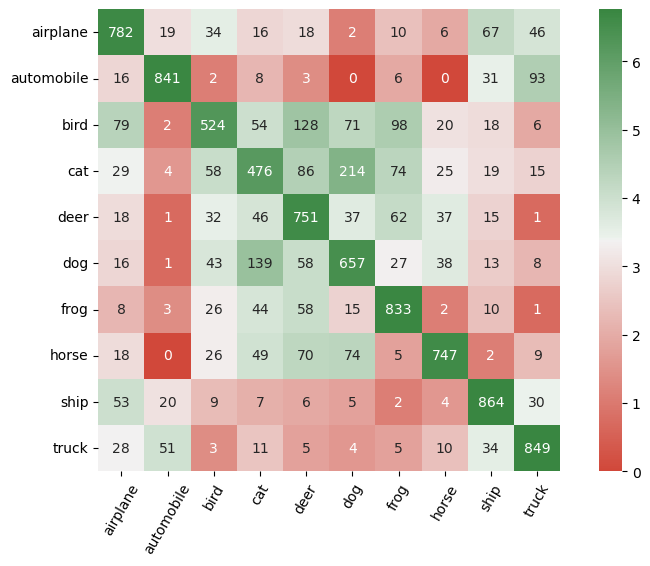

In [42]:
cm2 = confusion_matrix(y_test_cat2_2, y_pred2)

plt.figure(figsize=(10, 6))

sns.heatmap(np.log1p(cm2), annot=cm2, cmap=cmap, fmt='d',xticklabels=classes, yticklabels=classes, square=True)
plt.xticks(rotation=60)
plt.show()

- In this model our score is 73%, the best prediction is automobile  with 89%. 

- *!!! The results are much better, however we can build another model. !!!* 

## MODELLING - 3

In [43]:
from tensorflow.keras.layers import BatchNormalization

In [44]:
model3 = Sequential()

model3.add(Conv2D(16, kernel_size=(4, 4), input_shape=(X_train.shape[1:]), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(32, kernel_size=(4, 4), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2, 2)))

model3.add(Conv2D(64, kernel_size=(4, 4), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(128, kernel_size=(4, 4), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2, 2)))

model3.add(Conv2D(64, kernel_size=(4, 4), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(32, kernel_size=(4, 4), activation='relu', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPool2D((2, 2)))

model3.add(Flatten())

model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(10, activation='softmax'))

model3.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate = 0.01))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 16)        784       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        8224      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [45]:
fitData3 = model3.fit(X_train, y_train_cat, batch_size=16, epochs=50, validation_data=(X_test, y_test_cat),
                      callbacks=[earlyStoppingCallback, TqdmCallback()], verbose=True)
fitData3

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/50
3125/3125 [==============================] - 27s 8ms/step - loss: 1.6631 - accuracy: 0.3833 - val_loss: 1.6498 - val_accuracy: 0.4278
Epoch 2/50
3125/3125 [==============================] - 24s 8ms/step - loss: 1.1681 - accuracy: 0.5885 - val_loss: 1.1444 - val_accuracy: 0.6327
Epoch 3/50
3125/3125 [==============================] - 24s 8ms/step - loss: 0.9668 - accuracy: 0.6690 - val_loss: 0.9500 - val_accuracy: 0.6775
Epoch 4/50
3125/3125 [==============================] - 24s 8ms/step - loss: 0.8420 - accuracy: 0.7129 - val_loss: 0.8539 - val_accuracy: 0.7145
Epoch 5/50
3125/3125 [==============================] - 24s 8ms/step - loss: 0.7528 - accuracy: 0.7472 - val_loss: 0.9621 - val_accuracy: 0.7005
Epoch 6/50
3125/3125 [==============================] - 24s 8ms/step - loss: 0.6762 - accuracy: 0.7766 - val_loss: 0.7375 - val_accuracy: 0.7623
Epoch 7/50
3125/3125 [==============================] - 22s 7ms/step - loss: 0.6163 - accuracy: 0.7982 - val_loss: 0.9288 - val_ac

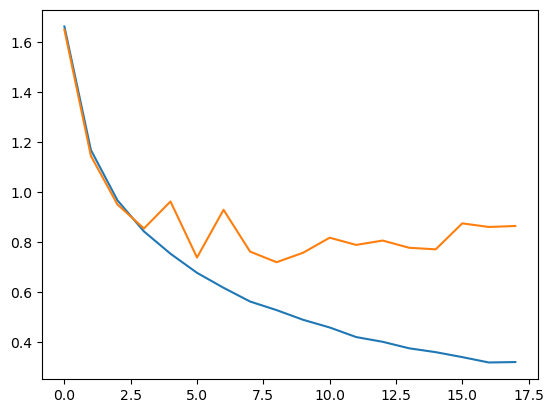

In [46]:
loss3 = fitData3.history['loss']
val_loss3 = fitData3.history['val_loss']
acc3 = fitData3.history['accuracy']
val_acc3 = fitData3.history['val_accuracy']

plt.plot(loss3)
plt.plot(val_loss3)
plt.show()

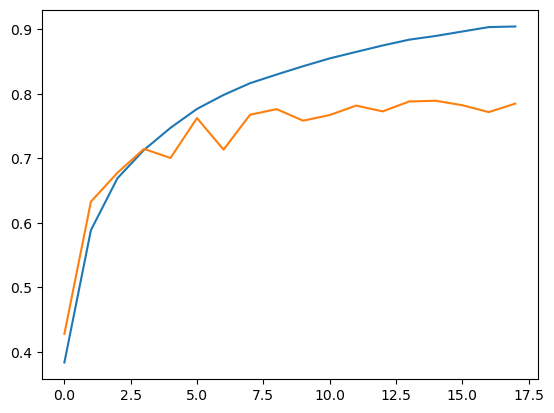

In [47]:
plt.plot(acc3)
plt.plot(val_acc3)
plt.show()

In [48]:
ev3 = model3.evaluate(X_test, y_test_cat, callbacks=[tfa.callbacks.TQDMProgressBar()])

0/313           ETA: ?s - Evaluating

313/313 [==============================] - 2s 5ms/step - loss: 0.7704 - accuracy: 0.7892


In [49]:
y_preds3 = model3.predict(X_test)
y_preds3

313/313 [==============================] - 1s 3ms/step


array([[4.3433716e-05, 4.7139523e-07, 2.6280382e-03, ..., 8.8128593e-04,
        2.0501077e-04, 1.1274194e-03],
       [7.3256241e-09, 5.1825604e-04, 1.1812763e-16, ..., 8.9926741e-25,
        9.9948174e-01, 1.6778792e-08],
       [2.6720958e-03, 3.7024811e-01, 3.4681225e-06, ..., 2.7617839e-08,
        6.0490072e-01, 1.5148492e-02],
       ...,
       [3.9589782e-08, 5.4279479e-07, 4.8786099e-04, ..., 3.9193538e-04,
        1.1261942e-06, 8.1579566e-07],
       [6.1764877e-04, 9.9738806e-01, 2.6722848e-09, ..., 4.2208100e-07,
        5.7455956e-04, 1.2803680e-03],
       [1.4756318e-10, 6.9675662e-13, 5.3254606e-10, ..., 9.9999988e-01,
        9.4966590e-19, 4.7763981e-14]], dtype=float32)

In [50]:
y_pred3 = np.argmax(y_preds3, axis=1)
y_pred3

array([3, 8, 8, ..., 5, 1, 7])

In [51]:
y_test_cat2_3 = np.argmax(y_test_cat, axis=1)

In [52]:
print(classification_report(y_test_cat2_3, y_pred3, target_names=classes))

              precision    recall  f1-score   support

    airplane       0.84      0.77      0.81      1000
  automobile       0.89      0.94      0.91      1000
        bird       0.70      0.69      0.70      1000
         cat       0.51      0.72      0.60      1000
        deer       0.78      0.78      0.78      1000
         dog       0.77      0.66      0.71      1000
        frog       0.91      0.78      0.84      1000
       horse       0.82      0.84      0.83      1000
        ship       0.89      0.87      0.88      1000
       truck       0.92      0.84      0.88      1000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000



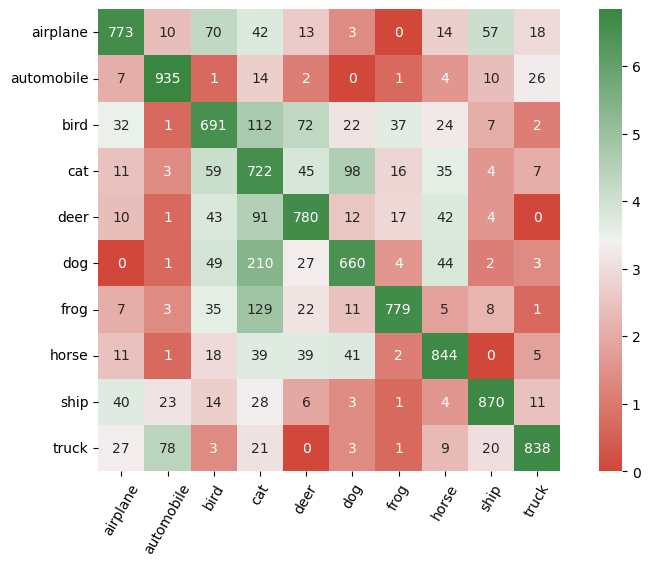

In [53]:
cm3 = confusion_matrix(y_test_cat2_3, y_pred3)

plt.figure(figsize=(10, 6))

sns.heatmap(np.log1p(cm3), annot=cm3, cmap=cmap, fmt='d',xticklabels=classes, yticklabels=classes, square=True)
plt.xticks(rotation=60)
plt.show()

- The best prediction is truck with 92% precision score.
- The worst prediction is cat with 51% score.
- *!!! As we see above the results are quite good with 79% accuracy score. !!!*

**Model2 has a good fit. Model3 has overfitting. Although Model3 has better Accuracy than Model2, we can choose Model2 as the Final Model.**

# **END**